# Load and display metadata linking options

In [1]:
import os
import sotools
from pprint import pprint
data_base = "docsource/source/examples/data/"
public_base = "https://my.server.net/data/"

## Example 00
`ds_00` uses the `encoding` pattern for associating a rich external metadata document with the Dataset. 

In [2]:
# Display the source of ds_00

fname = os.path.join(data_base, "ds_m_encoding.json")
print(open(fname).read())

{
   "@id":"ds-00",
   "@context": {
       "@vocab": "https://schema.org/"
   },
   "@type":"Dataset",
   "name": "Dataset with metadata encoding",
   "description": "Dataset snippet using SO:Encoding pattern for associated XML metadata.",
   "license": "https://creativecommons.org/publicdomain/zero/1.0/",
   "identifier": "dataset-00",
   "encoding": {
       "@id":"ds-00#media-object",
       "@type":"MediaObject",
       "contentUrl":"https://my.server.net/datasets/00.xml",
       "dateModified":"2019-10-10T12:43:11+00:00.000",
       "description":"ISO TC211 XML rendering of metadata",
       "encodingFormat":"http://www.isotc211.org/2005/gmd"
   }
}


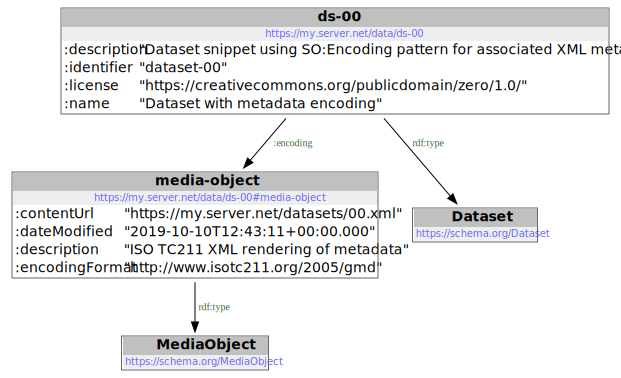

In [3]:
# Load and visualize the graph structure

g_00 = sotools.loadSOGraph(filename=fname, publicID=public_base)
sotools.renderGraph(g_00)

In [4]:
# extract the metadata links

mlinks = sotools.getDatasetMetadataLinks(g_00)
pprint(mlinks)

[{'contentUrl': 'https://my.server.net/datasets/00.xml',
  'dateModified': rdflib.term.Literal('2019-10-10T12:43:11+00:00.000'),
  'description': 'ISO TC211 XML rendering of metadata',
  'encodingFormat': 'http://www.isotc211.org/2005/gmd',
  'subjectOf': 'https://my.server.net/data/ds-00'}]


## Example 01
`ds_01` uses the `about` pattern to assert that an external metadata 
document (indicated by the `MediaObject`) is about the Dataset and the 
`data_part_a.csv` part of the Dataset.

In [5]:
# Display the source of ds_01

fname = os.path.join(data_base, "ds_m_about.json")
print(open(fname).read())

{
  "@context": {
    "@vocab": "https://schema.org/"
  },
  "@graph": [
    {
      "@type": "Dataset",
      "@id": "./",
      "identifier": "dataset-01",
      "name": "Dataset with metadata about",
      "description": "Dataset snippet with metadata and data components indicated by hasPart and the descriptive metadata through an about association.",
      "license": "https://creativecommons.org/publicdomain/zero/1.0/",
      "hasPart": [
        {
          "@id": "./metadata.xml"
        },
        {
          "@id": "./data_part_a.csv"
        }
      ]
    },
    {
      "@id": "./metadata.xml",
      "@type": "MediaObject",
      "contentUrl": "https://example.org/my/data/1/metadata.xml",
      "dateModified": "2019-10-10T12:43:11+00:00.000",
      "description": "A metadata document describing the Dataset and the data component",
      "encodingFormat":"http://www.isotc211.org/2005/gmd",
      "about": [
        {
          "@id": "./"
        },
        {
          "@id": ".

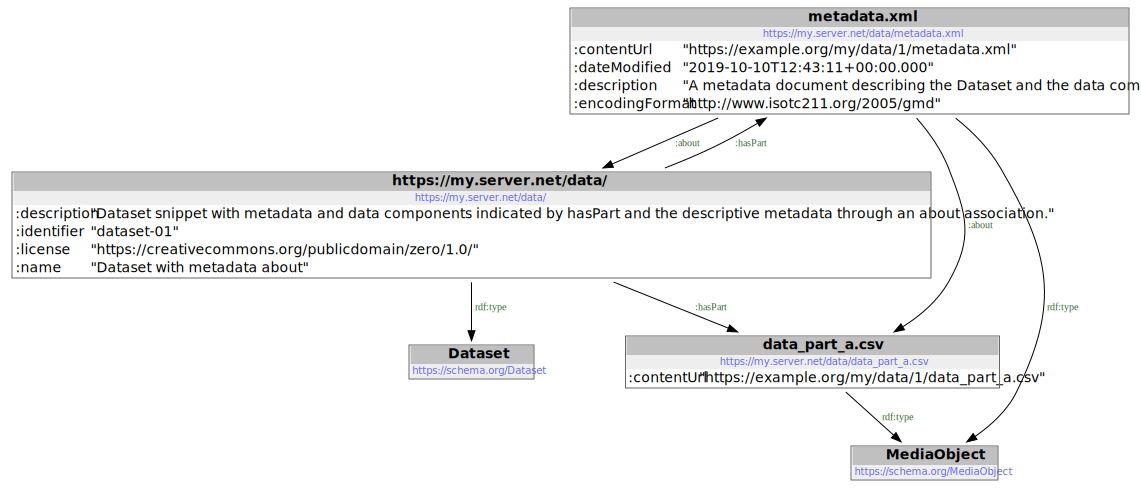

In [6]:
# Load and visualize the graph structure

g_01 = sotools.loadSOGraph(filename=fname, publicID=public_base)
sotools.renderGraph(g_01)

In [7]:
# extract the metadata links

mlinks = sotools.getDatasetMetadataLinks(g_01)
pprint(mlinks)

[{'contentUrl': 'https://example.org/my/data/1/metadata.xml',
  'dateModified': rdflib.term.Literal('2019-10-10T12:43:11+00:00.000'),
  'description': 'A metadata document describing the Dataset and the data '
                 'component',
  'encodingFormat': 'http://www.isotc211.org/2005/gmd',
  'subjectOf': 'https://my.server.net/data/'}]


## Example 02
`ds_02` uses the `subjectOf` pattern (i.e. inverse of `about`) to indicate that the
Dataset is the subjectOf the external metadata document referenced in the CreativeWork 
at `ds-02/metadata.xml`.

In [8]:
# Display the source of ds_02

fname = os.path.join(data_base, "ds_m_subjectof.json")
print(open(fname).read())

{
    "@context": {
        "@vocab": "https://schema.org/",
        "datacite": "http://purl.org/spar/datacite/"
    },
    "@id": "ds-02",
    "url": "https://my.server.org/data/ds-02",
    "@type": "Dataset",
    "identifier": "dataset-02",
    "name": "Dataset subjectOf metadata",
    "description": "Dataset snippet with descriptive metadata indicated through subjectOf relation.",
    "license": "https://creativecommons.org/publicdomain/zero/1.0/",
    "subjectOf": {
        "@id": "ds-02/metadata.xml",
        "@type": "CreativeWork",
        "name": "Dublin Core Metadata Document Describing the Dataset",
        "url": "https://my.server.org/data/ds-02/metadata.xml",
        "encodingFormat": ["application/rdf+xml", "http://ns.dataone.org/metadata/schema/onedcx/v1.0"]
    }
}


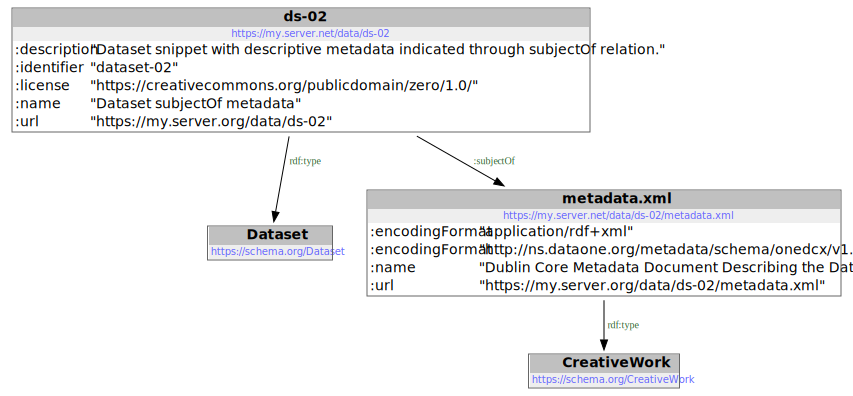

In [10]:
# Load and visualize the graph structure

g_02 = sotools.loadSOGraph(filename=fname, publicID=public_base)
sotools.renderGraph(g_02)

In [11]:
# extract the metadata links
# Multiple entries are responsive to the query because there are two
# encodingFormat values

mlinks = sotools.getDatasetMetadataLinks(g_02)
pprint(mlinks)



[{'contentUrl': 'https://my.server.org/data/ds-02/metadata.xml',
  'dateModified': None,
  'description': 'None',
  'encodingFormat': 'application/rdf+xml',
  'subjectOf': 'https://my.server.net/data/ds-02'},
 {'contentUrl': 'https://my.server.org/data/ds-02/metadata.xml',
  'dateModified': None,
  'description': 'None',
  'encodingFormat': 'http://ns.dataone.org/metadata/schema/onedcx/v1.0',
  'subjectOf': 'https://my.server.net/data/ds-02'}]


## Example 03

Load content from an ARM landing page.

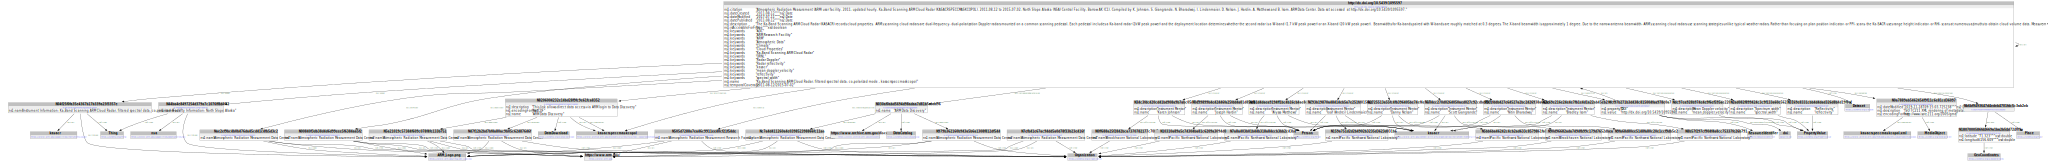

In [13]:
url = "https://www.archive.arm.gov/metadata/adc/html/kasacrspeccmaskcopol.html"

g_03 = sotools.loadSOGraphFromUrl(url)

sotools.renderGraph(g_03)

In [14]:
mlinks = sotools.getDatasetMetadataLinks(g_03)
pprint(mlinks)

[{'contentUrl': 'https://www.archive.arm.gov/metadata/adc/xml/kasacrspeccmaskcopol.xml',
  'dateModified': rdflib.term.Literal('2019-11-18T09:15:03.725238', datatype=rdflib.term.URIRef('http://schema.org/Date')),
  'description': 'ISO TC211 XML rendering of metadata.',
  'encodingFormat': 'http://www.isotc211.org/2005/gmd',
  'subjectOf': 'http://dx.doi.org/10.5439/1095597'}]


In [15]:
dataset_identifiers = sotools.getDatasetIdentifiers(g_03)
pprint(dataset_identifiers)

[{'propertyId': 'DOI',
  'url': 'http://dx.doi.org/10.5439/1095597',
  'value': 'http://dx.doi.org/10.5439/1095597'}]
